### Parte 1 Infraestrutura

Importando a biblioteca

In [1]:
import sys
import subprocess
import pyautogui
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns

Você está rodando em Python 3.9+

In [2]:
print("Versão do Python:", sys.version)

Versão do Python: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]


Você está usando um ambiente virtual: Virtualenv ou Anaconda

In [3]:
print("Ambiente virtual ativo:", sys.prefix)

Ambiente virtual ativo: c:\Users\cmbar\OneDrive - Tech-Data Solution\Desenvolvimento\ML-CLUSTERIZACAO\CLUSTERS


Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico

Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.

In [4]:
# Gera o arquivo requirements.txt com os pacotes instalados
with open("requirements.txt", "w") as file:
    subprocess.run(["pip", "freeze"], stdout=file)

print("Arquivo requirements.txt gerado com sucesso.")


Arquivo requirements.txt gerado com sucesso.


Tire um printscreen do ambiente que será usado rodando em sua máquina.

In [5]:
# Tira o print da tela e salva no arquivo screenshot.png
screenshot = pyautogui.screenshot()
screenshot.save("screenshot.png")

print("Screenshot salva como 'screenshot.png'")


Screenshot salva como 'screenshot.png'


Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle).

### Parte 2 Escolha de base de dados

Baixe os dados disponibilizados na plataforma Kaggle sobre dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento de um país. Esses dados estão disponibilizados através do link: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

In [6]:
df = pd.read_csv('DATA\Country-data.csv', encoding='latin-1', on_bad_lines='skip', sep=',')

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\cmbar\AppData\Local\Temp\ipykernel_12376\2434643470.py:1: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv('DATA\Country-data.csv', encoding='latin-1', on_bad_lines='skip', sep=',')


In [7]:
colunas_traduzidas = [
    'país', 'mortalidade_infantil', 'exportações', 'saúde', 'importações', 
    'renda', 'inflação', 'expectativa_de_vida', 'taxa_fertilidade', 'PIB'
]


In [8]:
# Atualiza o DataFrame com os novos nomes de coluna:
df.columns = colunas_traduzidas

Quantos países existem no dataset?

In [9]:
# Ver os valores únicos na coluna 'country'
unique_countries = df['país'].unique()

# Quantificar o número de países únicos
num_countries = df['país'].nunique()
print(f"Quantidade de países no dataset: {num_countries}")


Quantidade de países no dataset: 167


Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

In [10]:
#Carregar variaveis para plot
variaveis_numericas = []

for i in df.columns[0:11].to_list():
    if df.dtypes[i] == "int64" or df.dtypes[i] == "float64":
        variaveis_numericas.append(i)

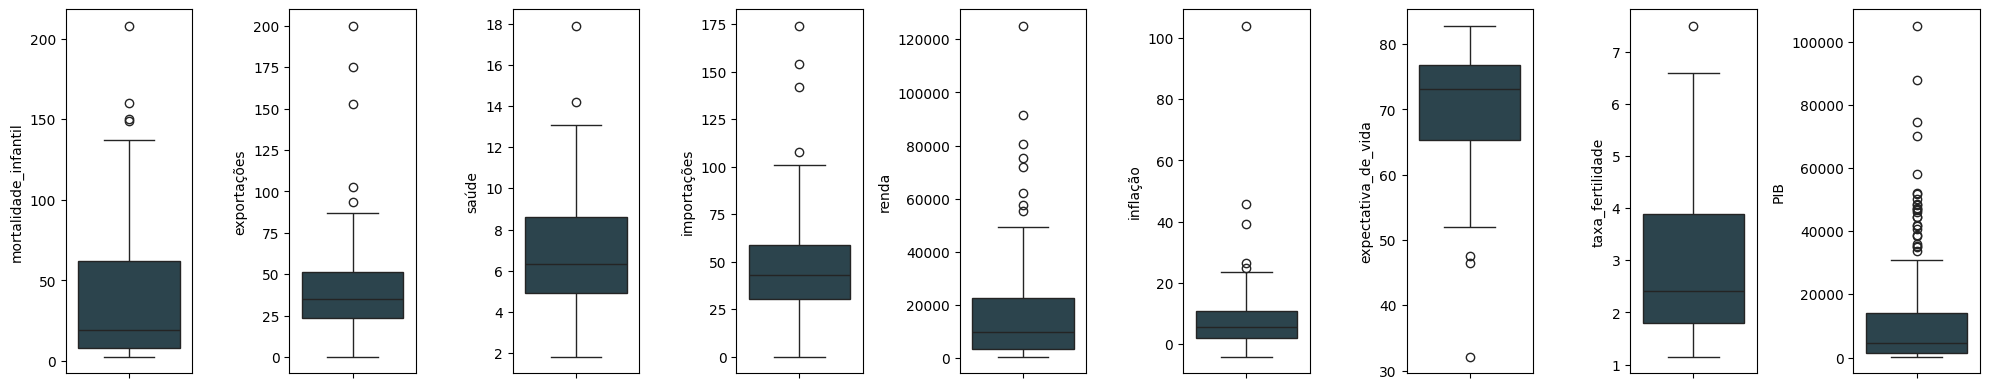

In [11]:
# Configurando o tamanho da figura
plt.rcParams['figure.figsize'] = [20.00, 4.00]
plt.rcParams['figure.autolayout'] = True

# Criando os subplots para cada variável numérica
f, axes = plt.subplots(1, len(variaveis_numericas))

# Iterando sobre as variáveis numéricas e os eixos correspondentes
for idx, i in enumerate(variaveis_numericas):
    sns.boxplot(data=df, y=i, ax=axes[idx], color='#264653')

plt.show()


Realize o pré-processamento adequado dos dados.

In [12]:
df.head()

,país,mortalidade_infantil,exportações,saúde,importações,renda,inflação,expectativa_de_vida,taxa_fertilidade,PIB
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [13]:
# Inicializar listas para cada tipo de dado
float_cols = []
int_cols = []
string_cols = []
object_cols = []
bool_cols = []
datetime_cols = []

In [14]:
# Iterar sobre as colunas do DataFrame e verificar os tipos
for col in df.columns:
    if pd.api.types.is_float_dtype(df[col]):
        float_cols.append(col)
    elif pd.api.types.is_integer_dtype(df[col]):
        int_cols.append(col)
    elif pd.api.types.is_string_dtype(df[col]):
        string_cols.append(col)
    elif pd.api.types.is_object_dtype(df[col]):
        object_cols.append(col)
    elif pd.api.types.is_bool_dtype(df[col]):
        bool_cols.append(col)
    elif pd.api.types.is_datetime64_any_dtype(df[col]):
        datetime_cols.append(col)

In [15]:
# Exibir as listas
print("Colunas float:", float_cols)
print("Colunas int:", int_cols)
print("Colunas string:", string_cols)
print("Colunas object:", object_cols)
print("Colunas bool:", bool_cols)
print("Colunas datetime:", datetime_cols)

Colunas float: ['mortalidade_infantil', 'exportações', 'saúde', 'importações', 'inflação', 'expectativa_de_vida', 'taxa_fertilidade']
Colunas int: ['renda', 'PIB']
Colunas string: ['país']
Colunas object: []
Colunas bool: []
Colunas datetime: []


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [17]:

df[int_cols] = scaler.fit_transform(df[int_cols])
df[float_cols] = scaler.fit_transform(df[float_cols])


### Parte 3 Clusterização

Realizar o agrupamento dos países em 3 grupos distintos. Para tal, use:
K-Médias
Clusterização Hierárquica

In [18]:
# Selecionar as variáveis para o clustering (excluindo 'país' se estiver no DataFrame)
variaveis_clusterizacao = df.drop(columns=['país'])


Para os resultados, do K-Médias:
Interprete cada um dos clusters obtidos citando:
Qual a distribuição das dimensões em cada grupo
O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique

In [19]:
from sklearn.cluster import KMeans

# Definir o modelo com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster_kmeans'] = kmeans.fit_predict(variaveis_clusterizacao)


Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados

C:\Users\cmbar\AppData\Local\Temp\ipykernel_12376\3995096770.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


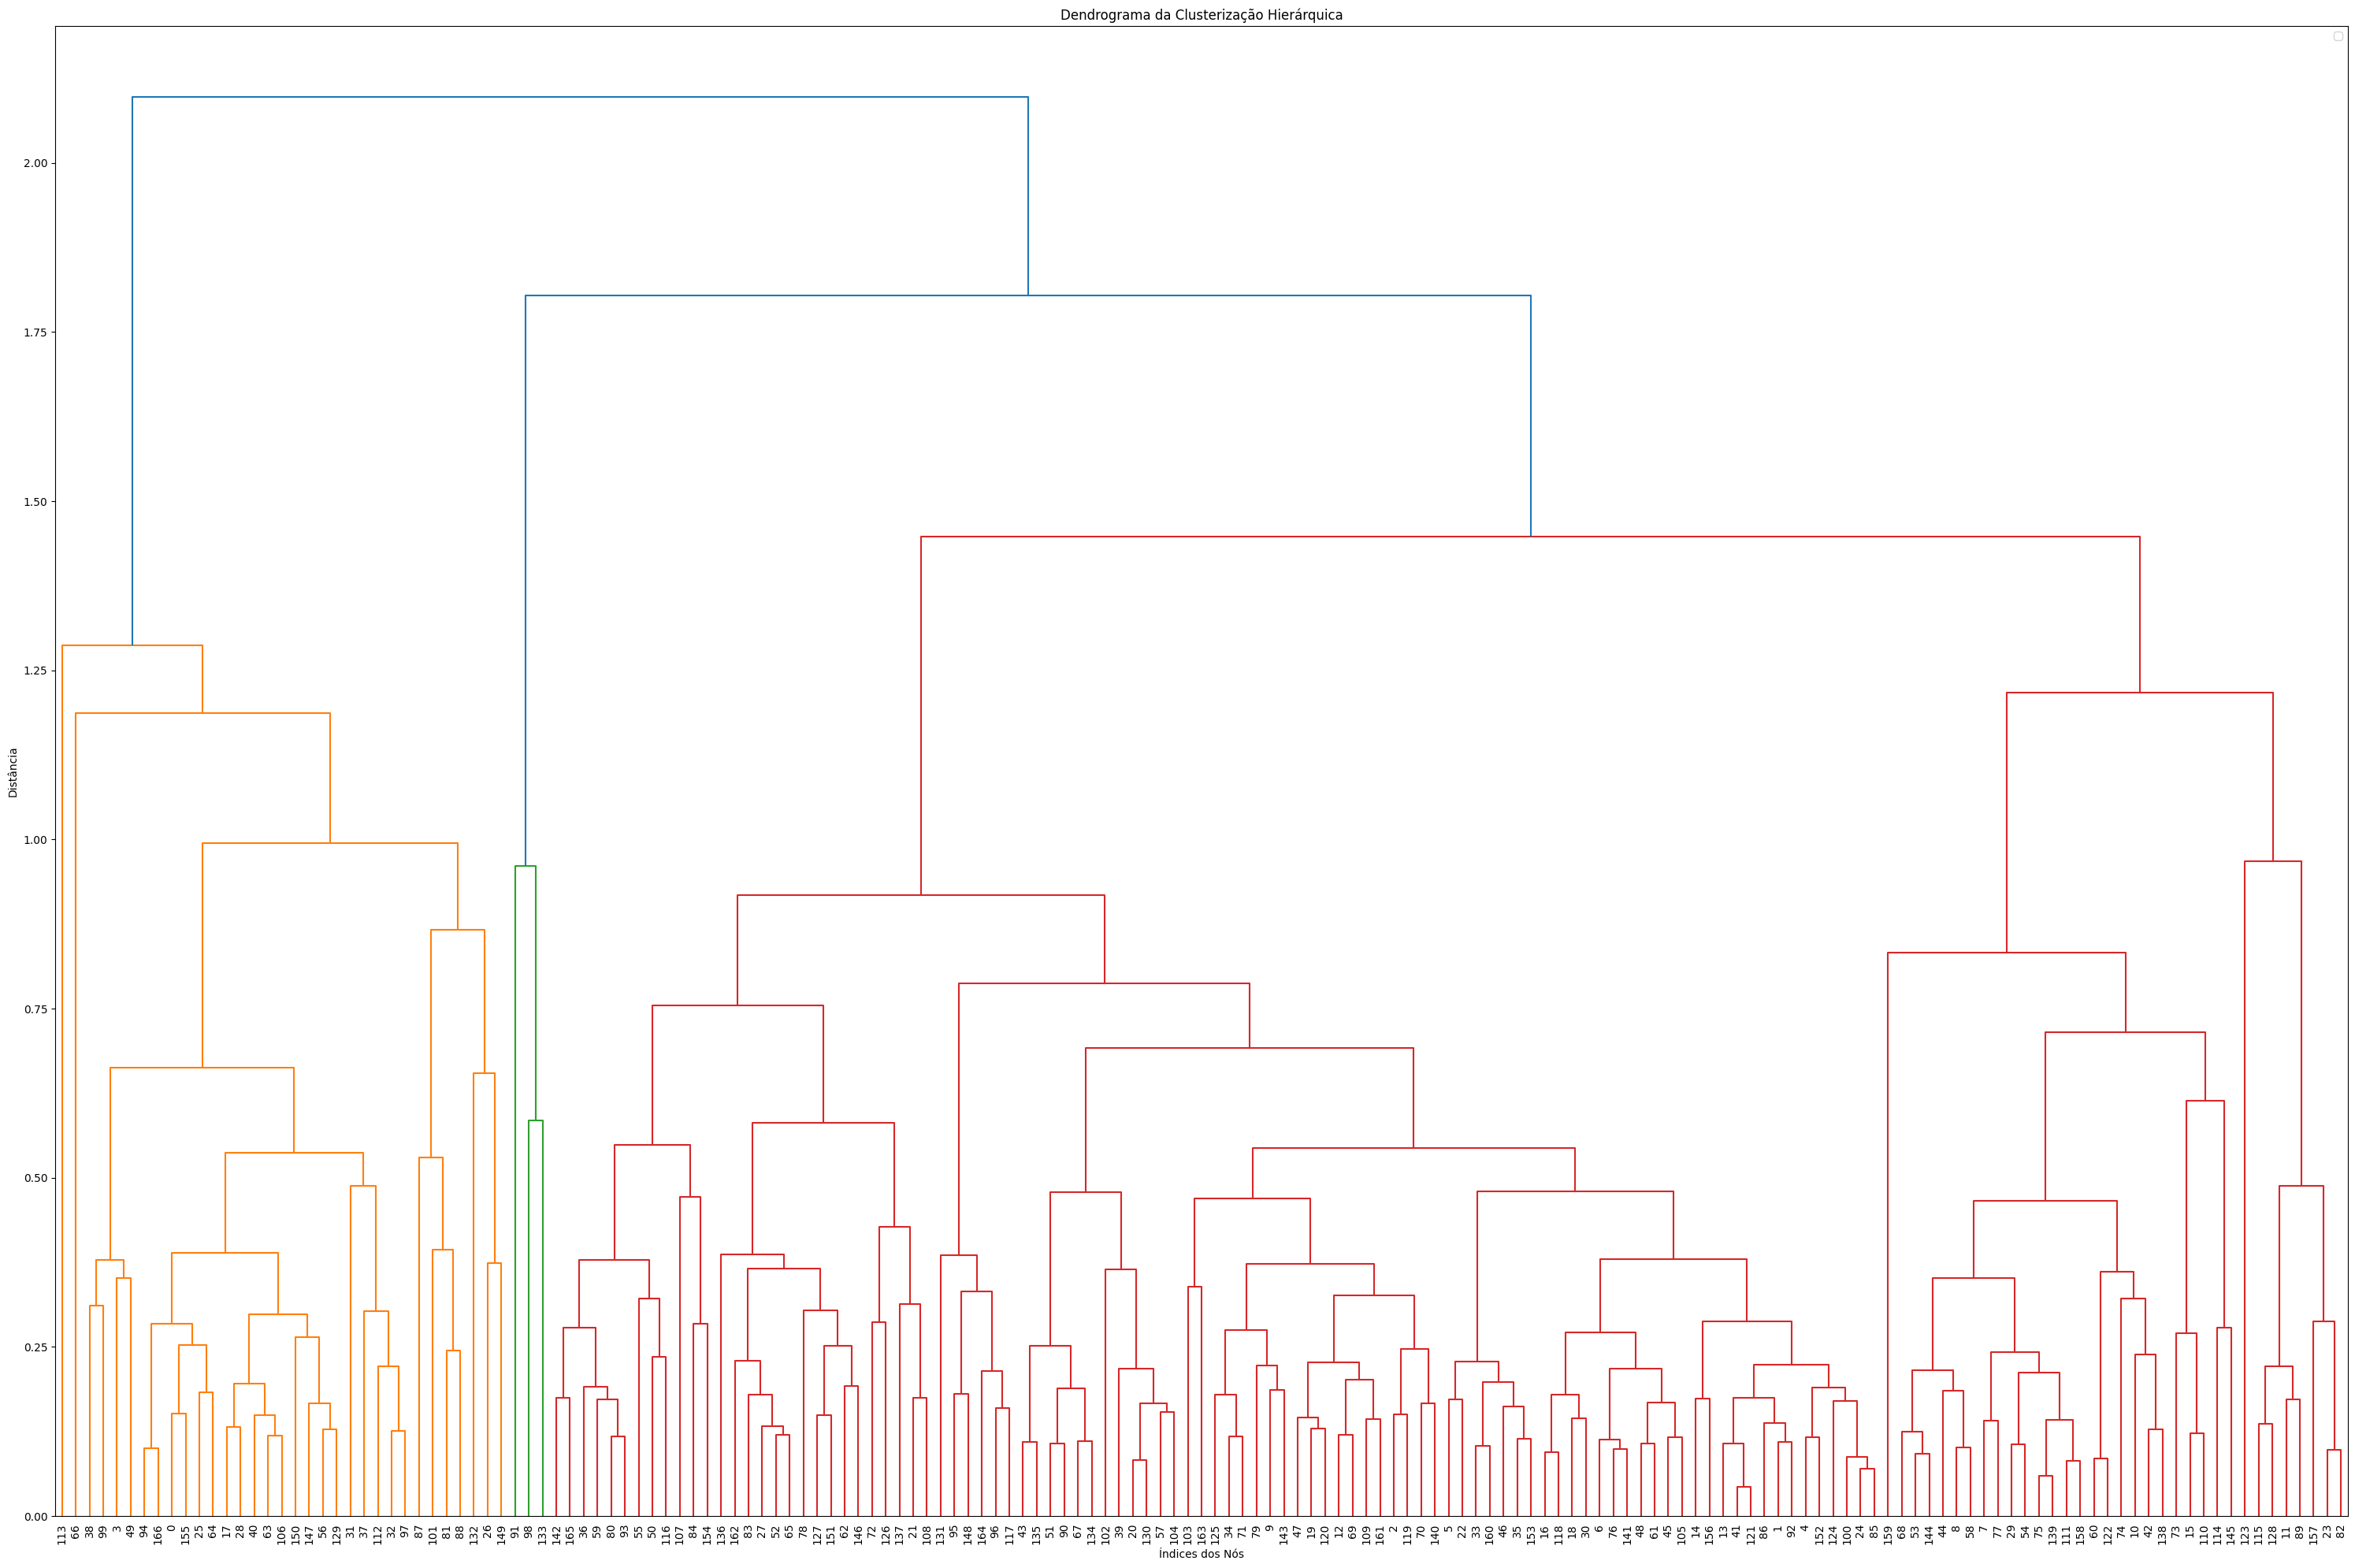

In [20]:
# Realizar a clusterização hierárquica
linkage_matrix = linkage(variaveis_clusterizacao, method='complete')

# Plotar o dendrograma
plt.figure(figsize=(30, 20))
dendro = dendrogram(linkage_matrix, labels=None, leaf_rotation=90, leaf_font_size=10)  # Remover os rótulos específicos dos países
plt.title("Dendrograma da Clusterização Hierárquica")
plt.xlabel("Índices dos Nós")
plt.ylabel("Distância")

# Traçar uma linha vermelha pontilhada para a distância euclidiana de corte
#distancia_corte = 15  # Ajuste este valor de corte conforme necessário
#plt.axhline(y=distancia_corte, color='red', linestyle='--', label=f'Corte na Distância {distancia_corte}')

# Adicionar rótulo do valor da distância em azul
#plt.text(x=len(linkage_matrix) / 2, y=distancia_corte + 2, s=f"Distância de Corte: {distancia_corte}", color='blue', ha='center')

plt.legend(loc='upper right')
plt.show()


Compare os dois resultados, aponte as semelhanças e diferenças e interprete.


### Parte 04 Escolha de algoritmos

Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.

O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.

Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.

O algoritmo de K-médias é sensível a outliers nos dados. Explique.

Por que o algoritmo de DBScan é mais robusto à presença de outliers?

Assim que terminar, salve o seu arquivo PDF e poste no Moodle. Utilize o seu nome para nomear o arquivo, identificando também a disciplina no seguinte formato: “nomedoaluno_nomedadisciplina_pd.PDF”.

In [21]:
print('fim')

fim
